<font size= "5"> Mall Customer Segmentation <font>


<font size ="3"> Abstract: <font>

The main aim of this problem is learning the purpose of the customer segmentation concepts, also known as market basket analysis, trying to understand customers and separate them in different groups according to their preferences, and once the division is done, this information can be given to marketing team so they can plan the strategy accordingly.

<font size ="3"> Introduction: <font>

Let's imagine you're owning a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score, which is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

<font size ="3"> Proposed System: <font>

The data includes the following features:
1. Customer ID
2. Gender
3. Age
4. Annual Income (in Thousand Dollars)
5. Spending score (1-100)

<font size ="3" > Below we did imported all the libraries which are required for the project to properly function.

numpy|pandas: Will help us treat and explore the data, and execute vector and matrix operations.
scipy: SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many more.
matplotlib|seaborn: Will help us plot the information so we can visualize it in different ways and have a better understanding of it.
sklearn: Will provide all necessary tools to train our models and test them afterwards. <font>

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
#reading data using pands to a dataframe and printing its head values
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#Getting 5 point summary of our dataframe
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<font size ="4">Visualizing Distributions<font>

G:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

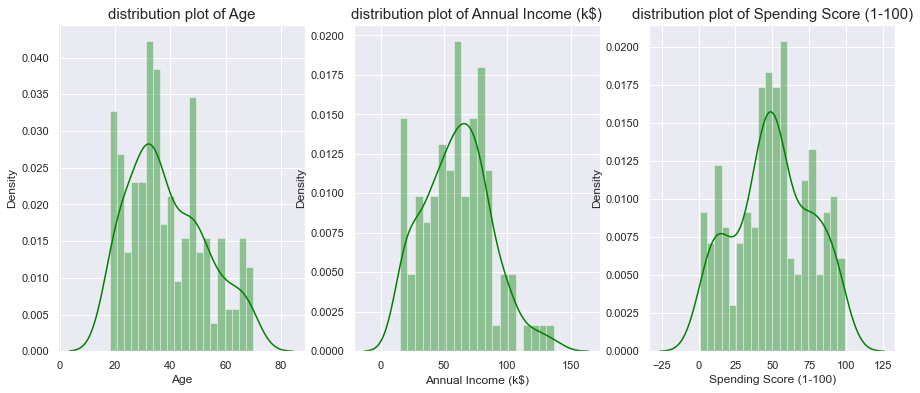

In [7]:
# distribution plot for 'Age', 'Annual Income', & 'Spending Score'.
plt.figure(figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n=n+1
    plt.subplot(1,3,n)
    sns.distplot(data[x],color= 'green',bins=20)
    plt.title('distribution plot of {}'.format(x), fontsize = 15)
plt.show()

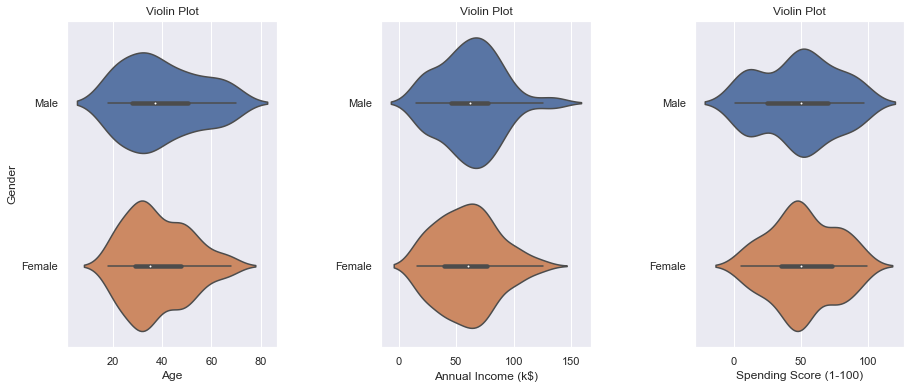

In [8]:
# violin plot for 'Age', 'Ammual Income', & 'Spending Score' based on gender.
plt.figure(figsize=(15,6))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n=n+1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x=cols,y='Gender',data=data)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')
plt.show()

<font size="4"> Heat Map <font>


In [9]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


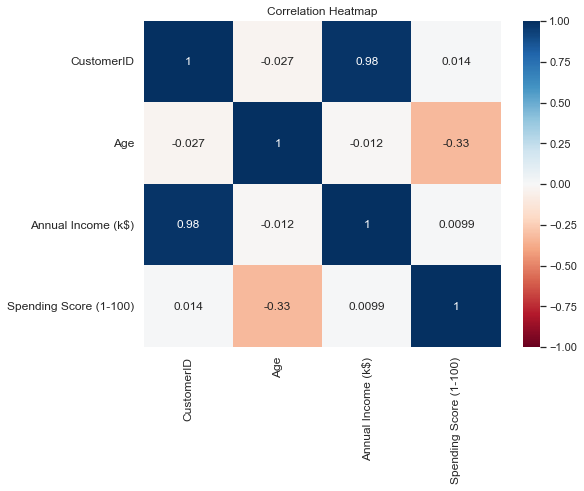

In [10]:
plt.figure(figsize=(8,6))
s=sns.heatmap(data.corr(), annot=True, cmap='RdBu', vmin = -1, vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()




<font size ="4"> The Elbow Method <font>


This elbow method show a low slope line after 5 number of cluster so we can take 5 as optimum number of cluster.

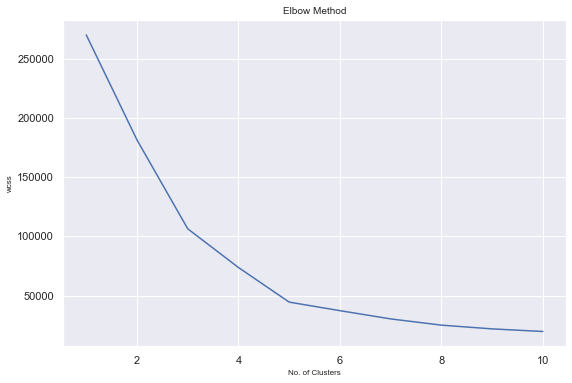

In [14]:

incs = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(incs)
    wcss.append(km.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method', fontsize = 10)
plt.xlabel('No. of Clusters', fontsize = 8)
plt.ylabel('wcss', fontsize = 8)
plt.show()

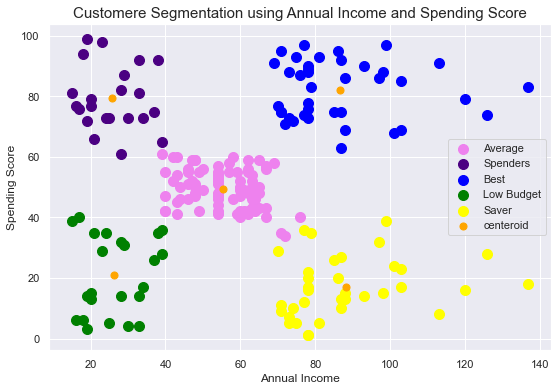

In [17]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(incs)

plt.figure(figsize=(9,6))
plt.scatter(incs[y_means == 0, 0], incs[y_means == 0, 1], s = 100, c = 'violet', label = 'Average')
plt.scatter(incs[y_means == 1, 0], incs[y_means == 1, 1], s = 100, c = 'indigo', label = 'Spenders')
plt.scatter(incs[y_means == 2, 0], incs[y_means == 2, 1], s = 100, c = 'blue', label = 'Best')
plt.scatter(incs[y_means == 3, 0], incs[y_means == 3, 1], s = 100, c = 'green', label = 'Low Budget')
plt.scatter(incs[y_means == 4, 0], incs[y_means == 4, 1], s = 100, c = 'yellow', label = 'Saver')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'orange' , label = 'centeroid')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

Based on the above clustering we can clearly say that there are five cluster segments present based on customers' Annual Income and Spending Score. We named them as Low budget, Spenders, Average, Savers, and Best.

G:\ANACONDA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


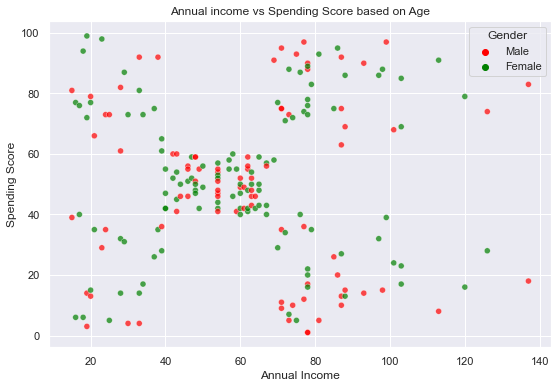

In [15]:
plt.figure(figsize=(9,6))
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'],hue=data['Gender'],
                palette= ['red','green'] ,alpha=0.7)
plt.title('Annual income vs Spending Score based on Age')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


This scatter plot show the distribution of customers based on their income, spending score and gender. And we can see customer cluster clearlly in this plot.

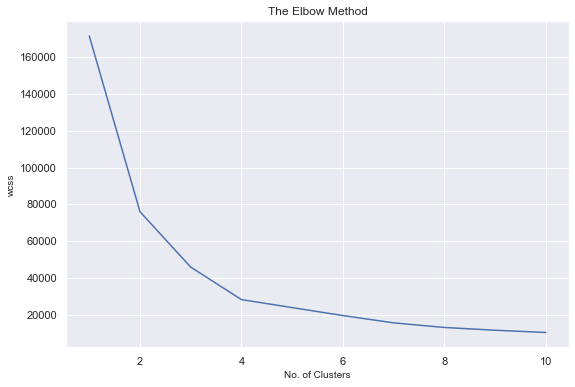

In [20]:
ags = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Ags)
    wcss.append(km.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 12)
plt.xlabel('No. of Clusters', fontsize = 10)
plt.ylabel('wcss', fontsize = 10)
plt.show()  

This elbow method show a low slope line after 4 number of cluster so we can take 4 as optimum number of cluster.


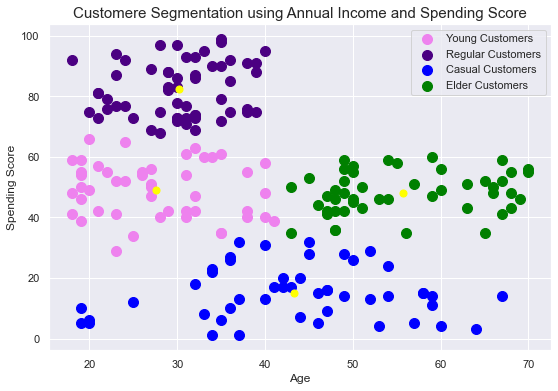

In [22]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = km.fit_predict(ags)

plt.figure(figsize=(9,6))
plt.scatter(ags[ymeans == 0, 0], ags[ymeans == 0, 1], s = 100, c = 'violet', label = 'Young Customers' )
plt.scatter(ags[ymeans == 1, 0], ags[ymeans == 1, 1], s = 100, c = 'indigo', label = 'Regular Customers')
plt.scatter(ags[ymeans == 2, 0], ags[ymeans == 2, 1], s = 100, c = 'blue', label = 'Casual Customers')
plt.scatter(ags[ymeans == 3, 0], ags[ymeans == 3, 1], s = 100, c = 'green', label = 'Elder Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'yellow')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

<font size="4"> Conclusion <font>


Based on the above clustering we can clearly say that there are four cluster segments present based on customers' Age and Spending Score. We named them as Regular Customers, Casual Customer, Young Customers, Elder Customers.



After implementation, we have come to the following conclusions:

KMeans Clustering is a powerful technique in order to achieve a decent customer segmentation.
Customer segmentation is a good way to understand the behaviour of different customers and plan a good marketing strategy accordingly.
There isn't much difference between the spending score of male and female, which leads us to think that our behaviour when it comes to shopping is pretty similar.
Observing the clustering graphic, it can be clearly observed that the ones who spend more money in malls are young people. That is to say they are the main target when it comes to marketing, so doing deeper studies about what they are interested in may lead to higher profits.
Promoting discounts on some shops can be something of interest to those who don't actually spend a lot and they may end up spending more!
